Shape: (7500, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7500 non-null   int64  
 1   Age                  7500 non-null   int64  
 2   Gender               7500 non-null   object 
 3   Height_cm            7500 non-null   float64
 4   Weight_kg            7500 non-null   float64
 5   BMI                  7500 non-null   float64
 6   Smoker               7500 non-null   object 
 7   Exercise_Freq        5621 non-null   object 
 8   Diet_Quality         7500 non-null   object 
 9   Alcohol_Consumption  5608 non-null   object 
 10  Chronic_Disease      7500 non-null   object 
 11  Stress_Level         7500 non-null   int64  
 12  Sleep_Hours          7500 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 761.8+ KB


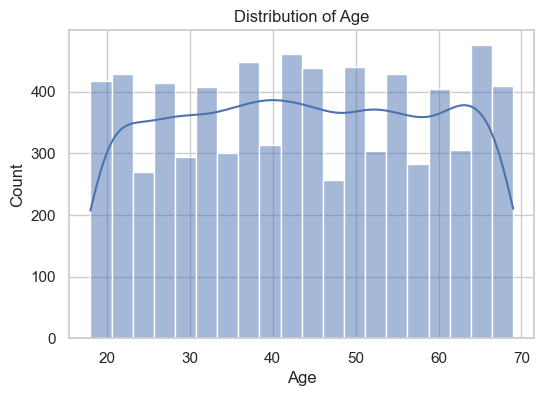

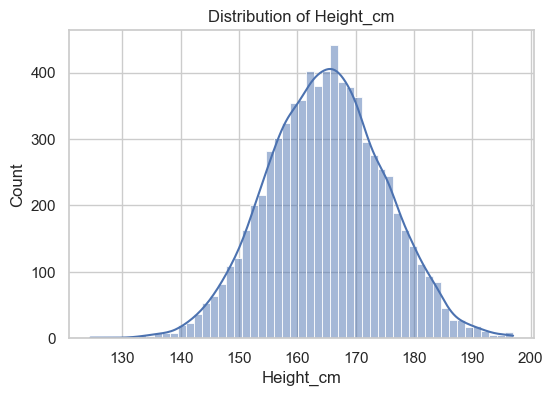

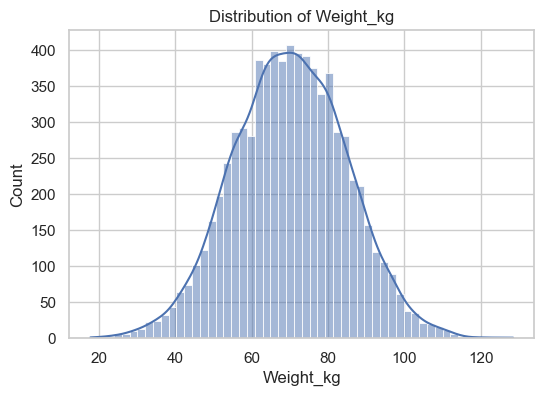

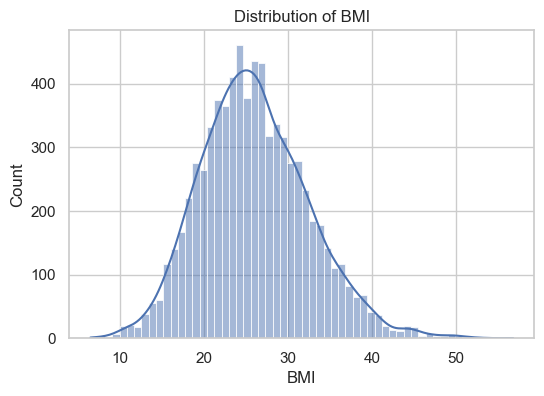

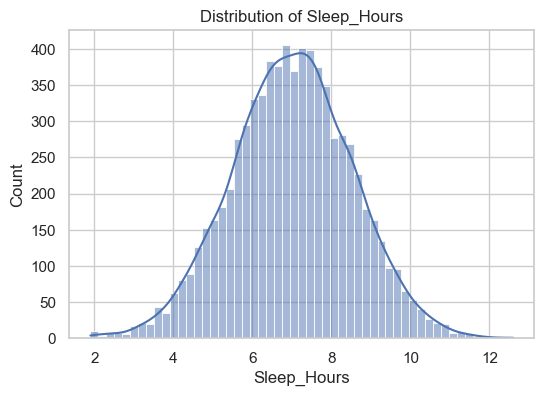

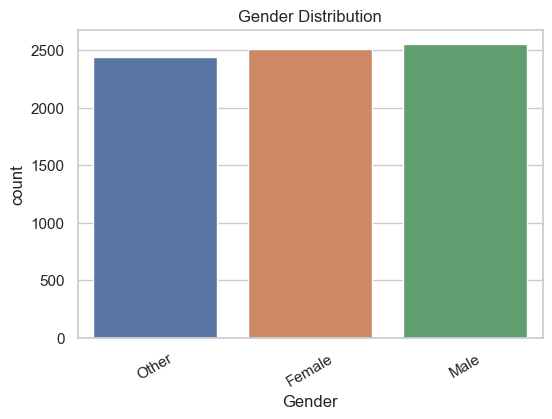

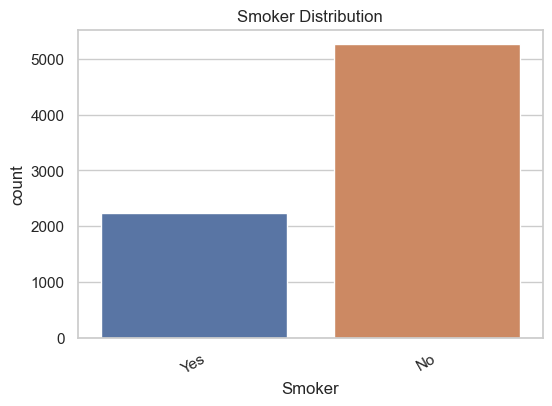

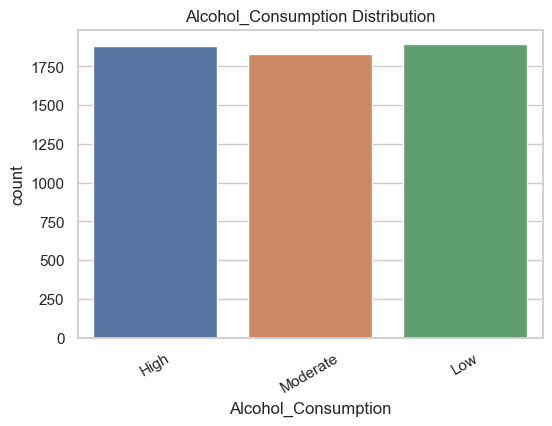

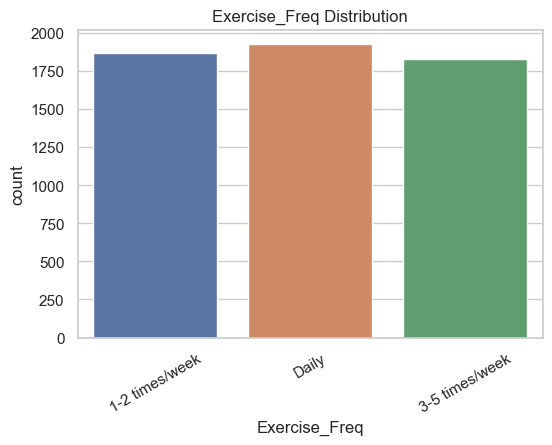

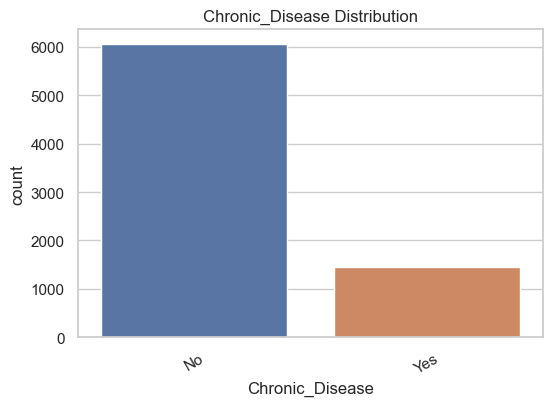

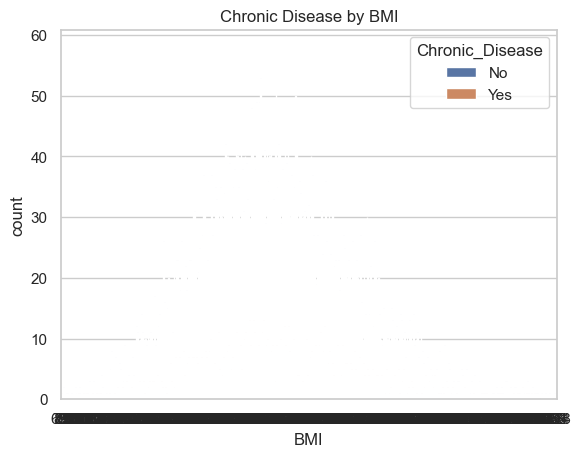

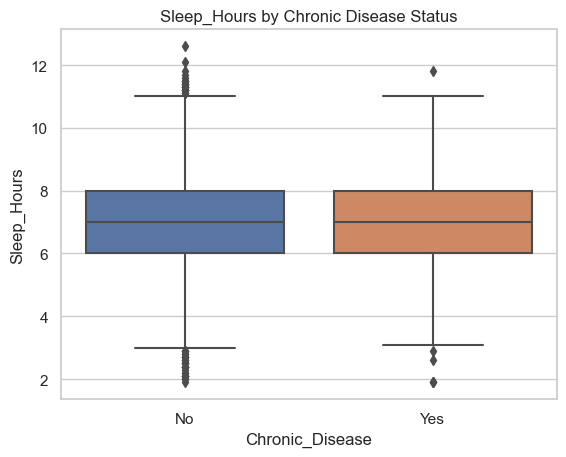

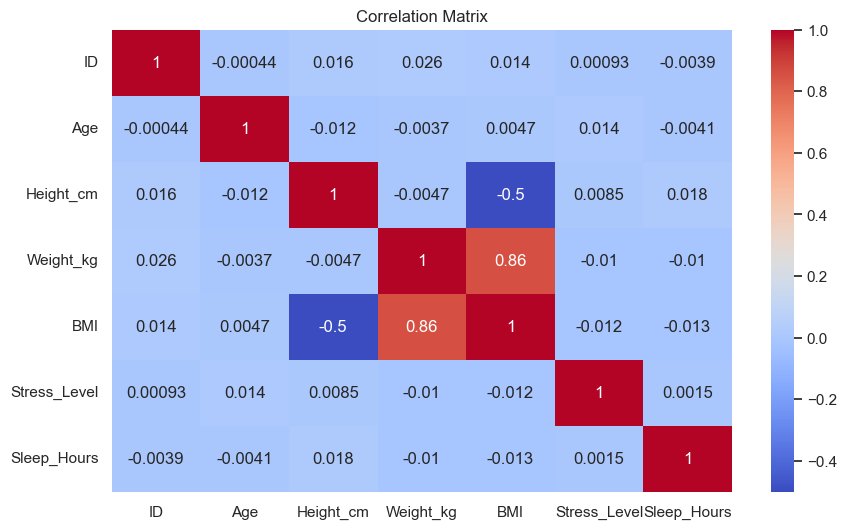

In [45]:
# This is EDA on a synthetic Health and Lifestyle dataset of 7500 individuals.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(style="whitegrid")

# Dataset is loaded
df = pd.read_csv("/Users/sundayomotoye/Downloads/synthetic_health_lifestyle_dataset.csv")
df.head()

# To check the Dataset
print("Shape:", df.shape)
df.info()
df.describe()

# Checking for missing values.
df.isnull().sum()

# This is the Distribution plots
numeric_columns = ['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Sleep_Hours']
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# This is the Categorical counts
for col in ['Gender', 'Smoker', 'Alcohol_Consumption', 'Exercise_Freq', 'Chronic_Disease']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30)
    plt.show()

# The plot of Chronic disease by category
sns.countplot(data=df, x='BMI', hue='Chronic_Disease')
plt.title('Chronic Disease by BMI')
plt.show()

sns.boxplot(data=df, x='Chronic_Disease', y='Sleep_Hours')
plt.title('Sleep_Hours by Chronic Disease Status')
plt.show()

# This is heatmap correlation.
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [57]:
# Modeling (Classification Task â€“ Predict Chronic Disease)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
# Feature engineering: BMI category
def BMI_category(BMI):
    if BMI < 18.5: return 'Underweight'
    elif BMI < 25: return 'Normal'
    elif BMI < 30: return 'Overweight'
    else: return 'Obese'

df['BMI_category'] = df['BMI'].apply(BMI_category)

In [61]:
# Lifestyle score (simple model)
df['lifestyle_score'] = (
    df['Smoker'].map({'Yes': 1, 'No': 0}) +
    df['Alcohol_Consumption'].map({'Yes': 1, 'No': 0}) +
    df['Exercise_Freq'].map({'None': 2, 'Low': 1, 'Moderate': 0, 'High': 0})
)


In [63]:
# Encode labels
df_model = df.copy()
label_cols = ['Gender', 'Smoker', 'Alcohol_Consumption', 'Exercise_Freq', 'BMI_category', 'Chronic_Disease']
le = LabelEncoder()
for col in label_cols:
    df_model[col] = le.fit_transform(df_model[col])

In [69]:
# Features and target
X = df_model[['Age', 'BMI', 'Sleep_Hours', 'Gender', 'Smoker', 'Alcohol_Consumption', 'Exercise_Freq']]
y = df_model['Chronic_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Model training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [73]:
# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1185   14]
 [ 295    6]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1199
           1       0.30      0.02      0.04       301

    accuracy                           0.79      1500
   macro avg       0.55      0.50      0.46      1500
weighted avg       0.70      0.79      0.71      1500



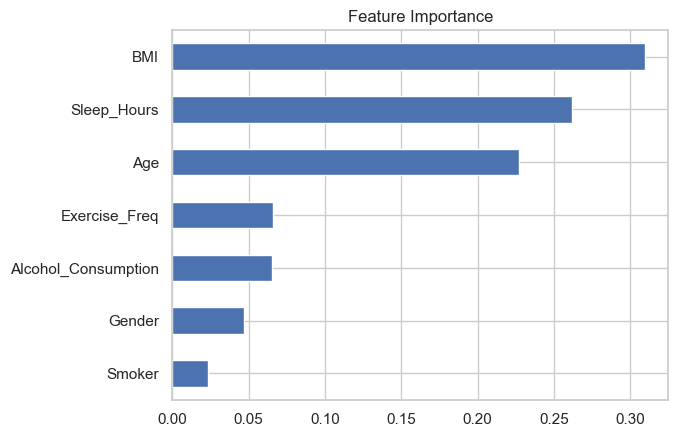

In [75]:
# Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()

In [79]:
# Generate health recommendations
def generate_advice(row):
    advice = []
    if row['Smoker'] == 'Yes': advice.append("Stop smoking.")
    if row['Alcohol_Consumption'] == 'Yes': advice.append("Limit alcohol.")
    if row['Exercise_Freq'] in ['None', 'Low']: advice.append("Exercise more.")
    if row['Sleep_Hours'] < 6: advice.append("Increase sleep duration.")
    if row['BMI_category'] in ['Overweight', 'Obese']: advice.append("Consult for weight control.")
    return " ".join(advice)

df['health_advice'] = df.apply(generate_advice, axis=1)

In [81]:
# Export for dashboard use
df.to_csv("health_lifestyle_with_recommendations.csv", index=False)
df[['Age', 'Gender', 'BMI_category', 'Chronic_Disease', 'health_advice']].head(10)

Age  Gender BMI_category Chronic_Disease  \
0   56   Other  Underweight              No   
1   69   Other       Normal              No   
2   46  Female   Overweight              No   
3   32    Male   Overweight              No   
4   60    Male       Normal             Yes   
5   25  Female       Normal              No   
6   38   Other        Obese             Yes   
7   56    Male       Normal              No   
8   36    Male  Underweight              No   
9   40   Other   Overweight             Yes   

                                       health_advice  
0                                      Stop smoking.  
1                           Increase sleep duration.  
2  Increase sleep duration. Consult for weight co...  
3                        Consult for weight control.  
4                                                     
5                           Increase sleep duration.  
6  Increase sleep duration. Consult for weight co...  
7                                                     
8                                                     
9  Stop smoking. Increase sleep duration. Consult...